In [26]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [27]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [28]:
results = pd.concat(results)

In [29]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auroc'].transform('mean')
results['mean_f1'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['f1_score'].transform('mean')

In [30]:
results.sort_values(['reduction_name', 'dataset', 'score_key'])

,reduction_name,score_key,state,fold,auroc,tpr,fpr,f1_score,oob_score,train_split,test_split,test_classes,dataset,mean_auc,mean_f1
2,mofa,expr_prod,0,0,0.444444,[0. 0.33333333 0.33333333 0.66666667 0...,[0. 0. 0.66666667 0.66666667 1...,0.333333,0.600000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.544444,0.547249
18,mofa,expr_prod,0,1,0.666667,[0. 0.33333333 0.66666667 0.66666667 1...,[0. 0. 0. 1. 1.],0.800000,0.636364,[ 0 4 5 6 7 10 11 12 13 14 15],[1 2 3 8 9],[0 0 1 1 1],carraro,0.544444,0.547249
34,mofa,expr_prod,0,2,0.666667,[0. 0.5 0.5 1. 1. ],[0. 0. 0.66666667 0.66666667 1...,0.600000,0.545455,[ 0 1 2 3 5 6 8 9 12 13 14],[ 4 7 10 11 15],[0 0 1 0 1],carraro,0.544444,0.547249
50,mofa,expr_prod,1,0,0.722222,[0. 0.33333333 0.66666667 0.66666667 1...,[0. 0. 0. 0.66666667 1...,0.485714,0.500000,[ 1 2 4 5 8 10 11 12 13 14],[ 0 3 6 7 9 15],[0 1 0 0 1 1],carraro,0.544444,0.547249
66,mofa,expr_prod,1,1,0.000000,[0. 0. 0. 0. 1.],[0. 0.25 0.75 1. 1. ],0.600000,0.636364,[ 0 1 3 6 7 8 9 10 13 14 15],[ 2 4 5 11 12],[0 0 0 0 1],carraro,0.544444,0.547249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,tensor,magnitude_rank,3,1,0.525000,[0. 0. 0.4 0.4 0.8 0.8 1. 1. ],[0. 0.125 0.125 0.625 0.625 0.875 0.875 1. ],0.538462,0.480000,[ 0 1 3 4 5 7 9 10 11 12 13 14 17 20 21 ...,[ 2 6 8 15 16 18 19 22 25 29 32 33 37],[0 1 0 0 0 1 0 0 1 0 1 1 0],velmeshev,0.501799,0.442448
187,tensor,magnitude_rank,3,2,0.542857,[0. 0. 0. 0.8 0.8 1. 1. ],[0. 0.14285714 0.42857143 0.42857143 0...,0.291667,0.576923,[ 0 2 6 8 10 13 15 16 17 18 19 20 21 22 24 ...,[ 1 3 4 5 7 9 11 12 14 23 26 27],[1 0 0 1 0 0 1 0 0 0 1 1],velmeshev,0.501799,0.442448
203,tensor,magnitude_rank,4,0,0.452381,[0. 0.16666667 0.16666667 0.33333333 0...,[0. 0. 0.14285714 0.14285714 0...,0.474359,0.560000,[ 0 1 2 3 4 6 7 8 10 11 12 13 14 15 17 ...,[ 5 9 16 20 21 23 24 25 27 33 34 36 37],[1 0 0 0 1 0 1 1 1 1 0 0 0],velmeshev,0.501799,0.442448
219,tensor,magnitude_rank,4,1,0.523810,[0. 0. 0.33333333 0.33333333 0...,[0. 0.14285714 0.14285714 0.28571429 0...,0.377289,0.640000,[ 1 4 5 9 10 12 13 14 16 17 19 20 21 23 24 ...,[ 0 2 3 6 7 8 11 15 18 22 26 29 35],[1 0 0 1 0 0 1 0 1 0 1 0 1],velmeshev,0.501799,0.442448


In [31]:
results['score_key'].unique()

array(['lr_means', 'expr_prod', 'lr_logfc', 'lrscore', 'lr_probs',
       'magnitude_rank', 'lr_gmeans', 'inter_score'], dtype=object)

In [32]:
remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'Product',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus',
              'inter_score': 'scSeqComm',
              'lr_gmeans': 'Geometric Mean',
              }
results['score_key'] = results['score_key'].map(remap_dict)

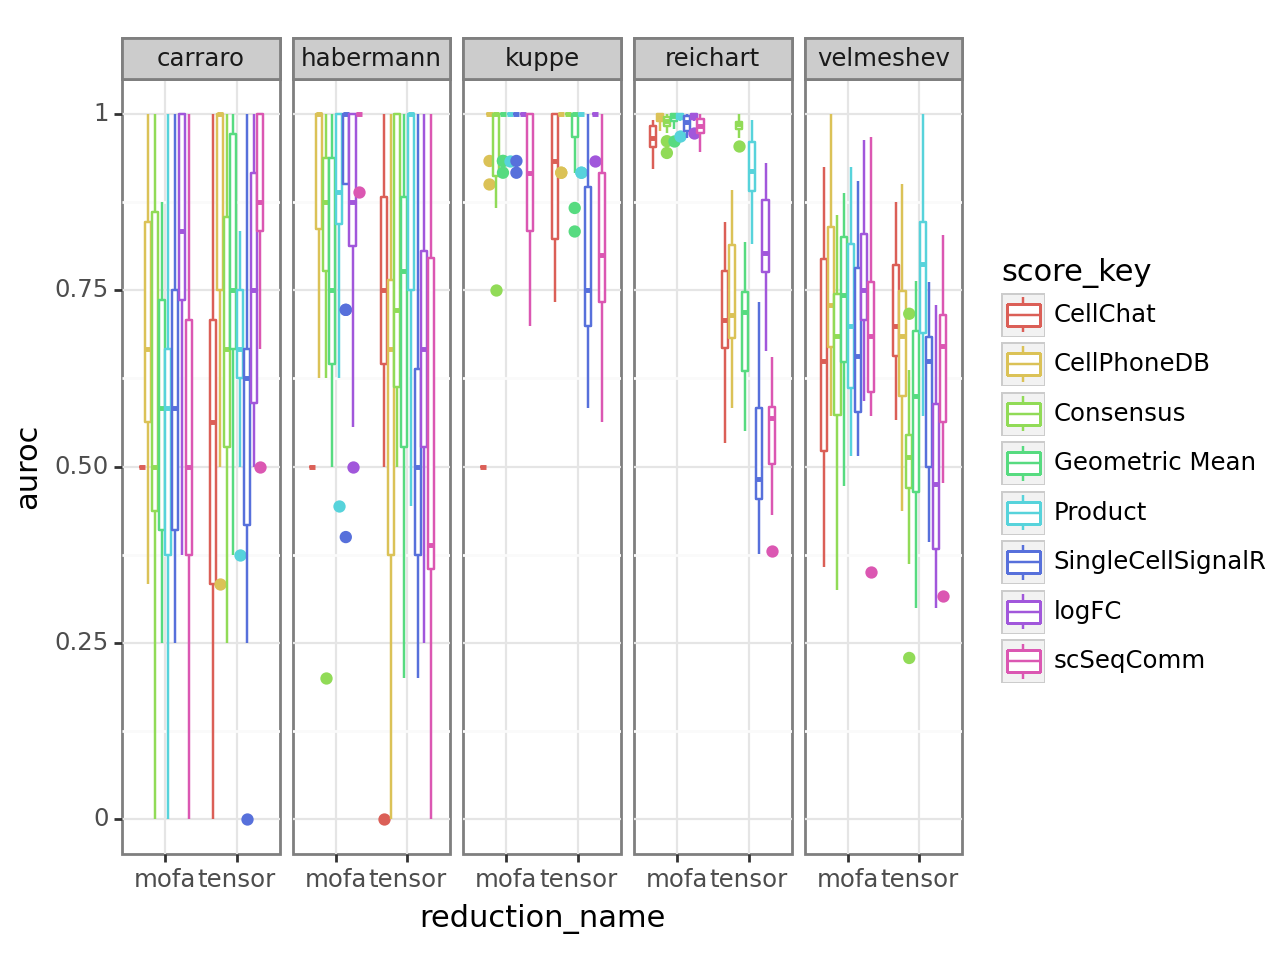

<Figure Size: (640 x 480)>

In [33]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auroc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

In [34]:
metric = 'mean_auc'

In [35]:
results = results[['reduction_name', 'score_key', 'mean_auc', 'mean_f1', 'dataset']].drop_duplicates()

In [36]:
results['rank'] = results.groupby(['dataset', 'reduction_name'])[metric].rank(ascending=False, method='average').astype('int')

In [37]:
results.head()

,reduction_name,score_key,mean_auc,mean_f1,dataset,rank
0,mofa,CellPhoneDB,0.700463,0.685820,carraro,2
1,tensor,CellPhoneDB,0.842593,0.662619,carraro,2
2,mofa,Product,0.544444,0.547249,carraro,6
3,tensor,Product,0.669444,0.420079,carraro,6
4,mofa,logFC,0.814815,0.659400,carraro,1


In [38]:
# mean rank per score
score_avg = results.groupby(['score_key', 'reduction_name'])[['rank', 'mean_auc', 'mean_f1']].mean()

In [39]:
score_avg

rank  mean_auc   mean_f1
score_key         reduction_name                          
CellChat          mofa             8.0  0.622320  0.437561
                  tensor           4.8  0.712613  0.640149
CellPhoneDB       mofa             2.6  0.869761  0.806814
                  tensor           3.6  0.762842  0.670395
Consensus         mofa             5.8  0.799964  0.704014
                  tensor           3.2  0.787172  0.694010
Geometric Mean    mofa             4.8  0.810504  0.723156
                  tensor           4.8  0.745409  0.686857
Product           mofa             3.6  0.823848  0.755972
                  tensor           2.6  0.842411  0.703940
SingleCellSignalR mofa             4.0  0.831930  0.727026
                  tensor           7.2  0.596185  0.532185
logFC             mofa             1.8  0.888580  0.801174
                  tensor           4.4  0.741308  0.668971
scSeqComm         mofa             5.4  0.819530  0.699319
                  tensor           5.2  0.678521  0.591709

In [40]:
score_avg['dataset'] = "Score Average"

In [41]:
## bind to results
results = pd.concat([results, score_avg.reset_index()])

In [42]:
# if dataset != 'Score Average', then None
results['rank'] = results['rank'].where(results['dataset'] == 'Score Average', None)

In [43]:
results['mean_auc'] = results['mean_auc'].round(2)
results['mean_f1'] = results['mean_f1'].round(2)

In [44]:
# to title

results['dataset'] = results['dataset'].replace({'Score Average': 'Average'})
results['dataset'] = pd.Categorical(results['dataset'], categories=['carraro', 'habermann', 'kuppe', 'velmeshev', 'reichart', 'Average'])
results['dataset'] = results['dataset'].str.title()

In [45]:
results['reduction_name'] = results['reduction_name'].replace({"mofa":"MOFA+", 'tensor':"Tensor-cell2cell"})

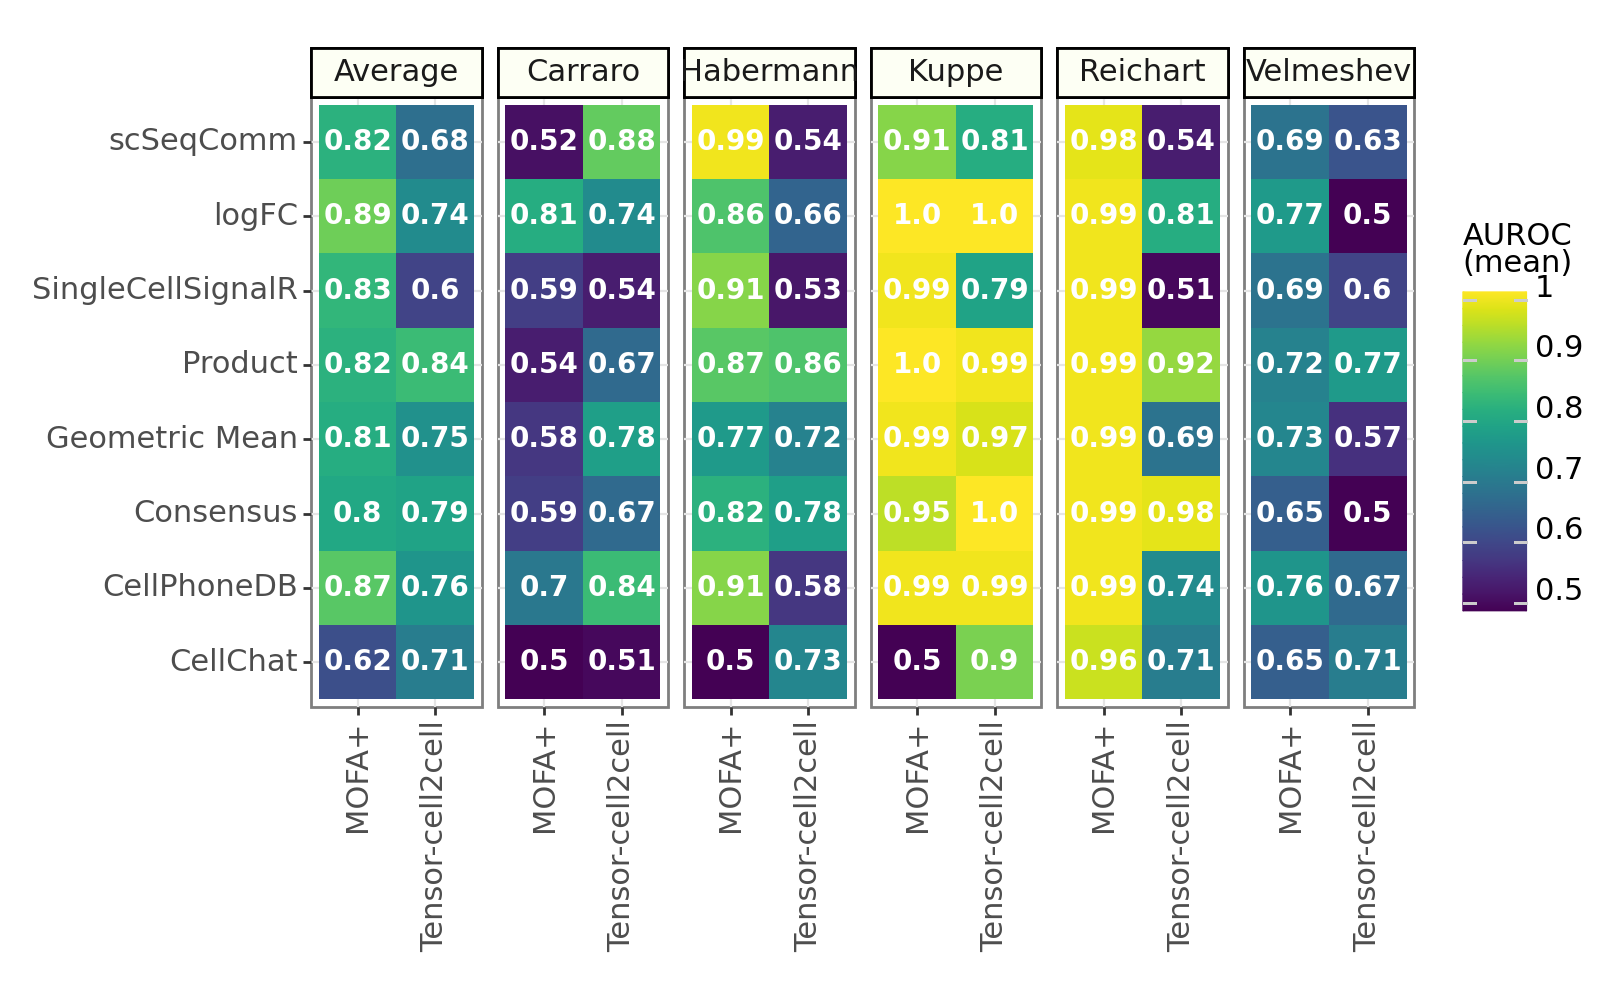

<Figure Size: (800 x 500)>

In [46]:
## mosaic plot
# order alphabetically
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
    p9.theme_bw(base_size=11) + \
    p9.facet_grid(' ~ dataset') + \
    p9.scale_fill_cmap(limits=(0.5, 1), cmap_name='viridis') + \
    p9.geom_text(p9.aes(label='mean_auc'), size=10, color='white', fontweight='bold') + \
    p9.theme(figure_size=(8, 5), axis_text_x=p9.element_text(angle=90, size=11),
             strip_text_x=p9.element_text(size=11),
            strip_background=p9.element_rect(colour="black", fill="#fdfff4"),
            legend_text=p9.element_text(size=11),
            axis_text_y=p9.element_text(size=11),
             ) + \
    p9.labs(x='', y='', fill='AUROC\n(mean)\n')

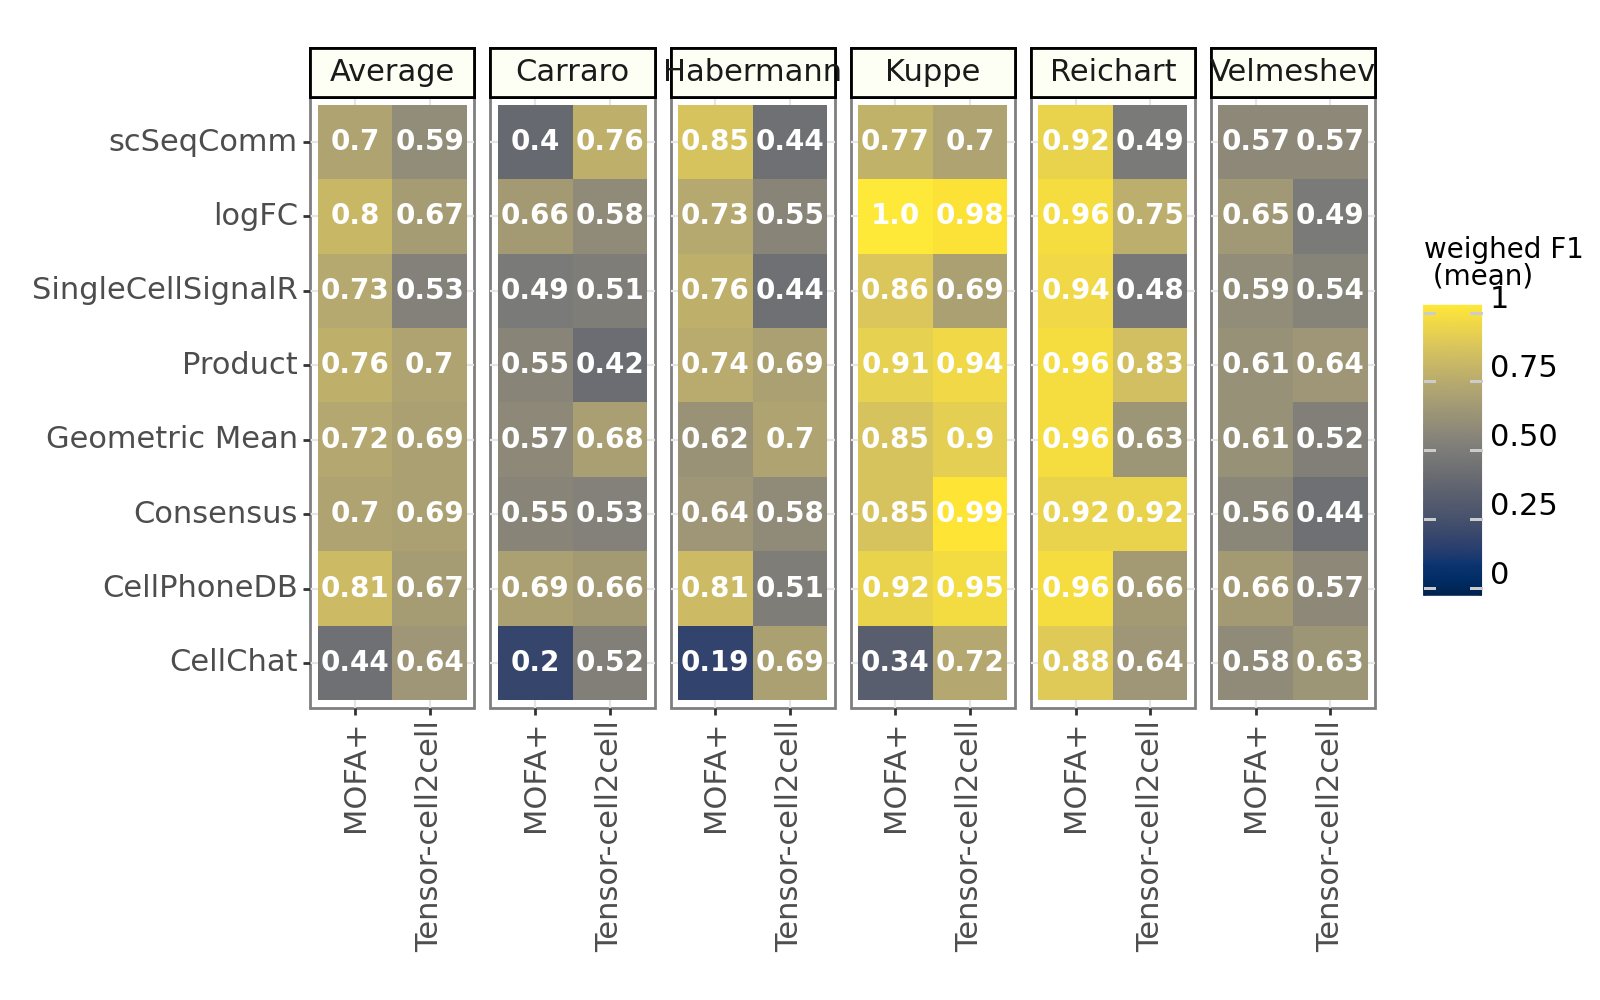

<Figure Size: (800 x 500)>

In [48]:
## mosaic plot
# order alphabetically
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_f1')) + \
    p9.geom_tile() + \
    p9.theme_bw(base_size=10) + \
    p9.facet_grid(' ~ dataset') + \
    p9.scale_fill_cmap(limits=(0, 1), cmap_name='cividis') + \
    p9.geom_text(p9.aes(label='mean_f1'), size=10, color='white', fontweight='bold') + \
    p9.theme(figure_size=(8, 5), axis_text_x=p9.element_text(angle=90, size=11),
             strip_text_x=p9.element_text(size=11),
            strip_background=p9.element_rect(colour="black", fill="#fdfff4"),
            legend_text=p9.element_text(size=11),
            axis_text_y=p9.element_text(size=11),
             ) + \
    p9.labs(x='', y='', fill='weighed F1\n (mean) \n')

In [22]:
import scanpy as sc

In [23]:
adata = sc.read_h5ad("data/results/carraro_dimred.h5ad")

In [24]:
adata.uns['mofa_res']['X'].keys()

dict_keys(['expr_prod', 'inter_score', 'lr_gmeans', 'lr_logfc', 'lr_means', 'lr_probs', 'lrscore', 'magnitude_rank'])